# Linear Regression
-Author: Duncan Kirby
-Sources: NB_CVI-linreg_diabetes.nb and NB_CVII-logreg_mnist.nb from Mehta et al. 2018

### Least Squares Regression with Regularization
In this section we will compare ridge regression with Lasso regression

In [ ]:
#This code is modified from NB_CVI-linreg_diabetes by Mehta, from plot_cv_diabetes.py in the skit-learn documentation
#and plot_ridge_path.py

from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import datasets, linear_model

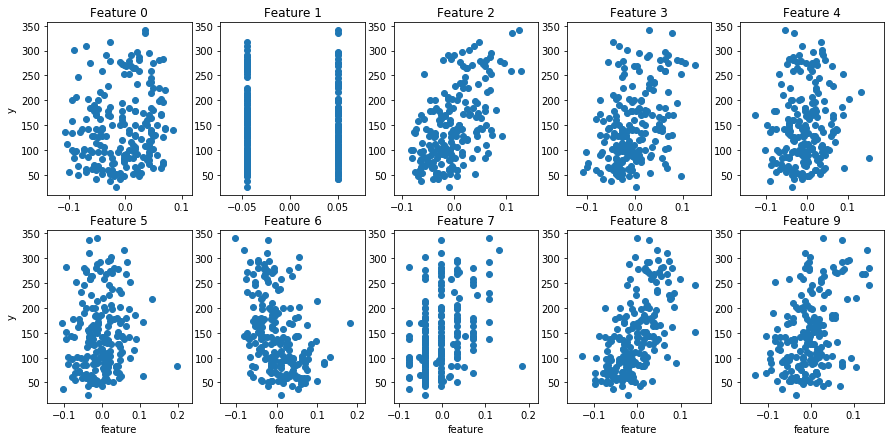

In [9]:
#Load Training Data set with 200 examples. There are 10 features per observation.

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Plot pairwise feature-vs-y plots
fig, axes = plt.subplots(nrows=2,ncols=5,figsize=(15,7))
axes[0][0].set_ylabel("y")
axes[1][0].set_ylabel("y")
for i in range(5):
    axes[1][i].set_xlabel("feature")
    axes[0][i].scatter([row[i] for row in X],y)
    axes[1][i].scatter([row[i+5] for row in X],y)
    axes[0][i].set_title("Feature {}".format(str(i)))
    axes[1][i].set_title("Feature {}".format(str(i+5)))

In [10]:
#Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


#Chooose a variety of different lambdas for regularization strength, to compare
lambdas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



#Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in lambdas:
    ridge.set_params(alpha=a) # ridge() uses alpha instead of labmda to label the regularization penalty strength
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)# lasso() uses alpha instead of labmda to label the regularization penalty strength
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))

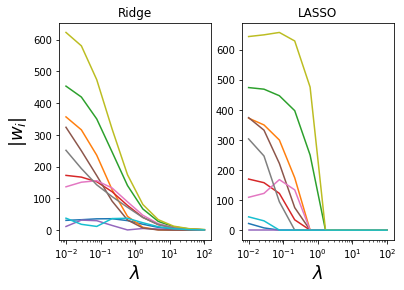

In [13]:
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(lambdas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(lambdas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()

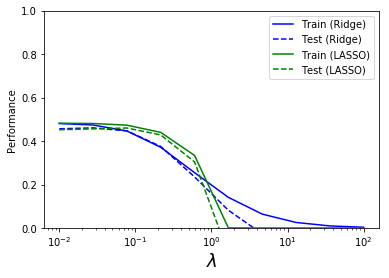

In [15]:

# Plot our performance on both the training and test data
plt.semilogx(lambdas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(lambdas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(lambdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lambdas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

### Now let's look at logistic regression
In this section we will implement the 

In [16]:
import time
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
train_size = 50000
test_size = 10000

# load MNIST data
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Automatically created module for IPython interactive environment


C:\Users\Duncan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Duncan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
# sklearn requires use of a regularization penalty with logistic regression. We will compare L1 to L2
# First, try logistic regression with L1 regularization penalty
# apply logistic regressor with ‘saga’ solver, C is the inverse regularization strength
t0 = time.time()
clf1 = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l1',solver='saga', tol=0.1)
# fit data
clf1.fit(X_train, y_train)
# percentage of nonzero weights
sparsity1 = np.mean(clf1.coef_ == 0) * 100
# compute accuracy
score1 = clf1.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L1 penalty: %.2f%%" % sparsity1)
print("Test score with L1 penalty: %.4f" % score1)

# Now try the same regression with a regularization penalty
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
t0 = time.time()
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 24.721 s
Sparsity with L1 penalty: 8.80%
Test score with L1 penalty: 0.8974
Example run in 5.944 s
Sparsity with L2 penalty: 8.80%
Test score with L2 penalty: 0.8960


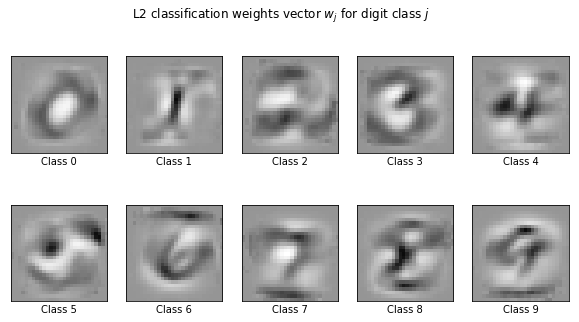

In [28]:
# The difference between L1 and L2 solutions is minimal in this case, so we only look at L2 solution
'''
# L1 solution
# plot weights vs the pixel position
coef1 = clf1.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef1).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef1[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('L1 classification weights vector $w_j$ for digit class $j$')

plt.show()
'''
# L2 solution
# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('L2 classification weights vector $w_j$ for digit class $j$')

plt.show()